In [1]:
import pandas as pd

In [ ]:
data = pd.read_csv('fog_dataset.csv')

In [1]:
import numpy as np
from scipy.stats import entropy
from tqdm import tqdm 
from typing import List
EPS = 1e-12

def calculate_signal_metrics(data, window_size, train: bool=True):
    result = {}
    
    signal = data[['AccV', 'AccML', 'AccAP']]
    
    start_hesitation = data['StartHesitation']
    turn = data['Turn']
    walking = data['Walking']
    

    num_windows = len(signal) // window_size
    
    dc_components = {}
    std_deviations = {}
    variances = {}
    entropies = {}
    energies = {}
    start_hesitations = []
    turns = []
    walkings = []
    
    for column in signal.columns:
        dc_components[column] = []
        std_deviations[column] = []
        variances[column] = []
        entropies[column] = []
        energies[column] = []
    
    for i in tqdm(range(num_windows)):
        window = signal[i*window_size:(i+1)*window_size]
        
        for column in signal.columns:
            dc_component = np.mean(window[column])
            dc_components[column].append(dc_component)
            
            std_deviation = np.std(window[column])
            std_deviations[column].append(std_deviation)
            
            variance = np.var(window[column])
            variances[column].append(variance)
            
            normalized_magnitudes = np.abs(np.fft.fft(window[column]))**2 / window_size
            signal_entropy = entropy(normalized_magnitudes + EPS)
            entropies[column].append(signal_entropy)
            
            energy = np.sum(np.abs(np.fft.fft(window[column]))**2) / window_size
            energies[column].append(energy)
        
        start_hesitation_window = start_hesitation[i*window_size:(i+1)*window_size]
        turn_window = turn[i*window_size:(i+1)*window_size]
        walking_window = walking[i*window_size:(i+1)*window_size]
        
        
        
        start_hesitations.append(max(start_hesitation_window))
        turns.append(max(turn_window))
        walkings.append(max(walking_window))
    
    result = {
        'mean': dc_components,
        'std': std_deviations,
        'var': variances,
        'entropy': entropies,
        'energy': energies,
        'StartHesitation': start_hesitations,
        'Turn': turns,
        'Walking': walkings
    }
    
    return result

In [3]:
res = calculate_signal_metrics(data, 512)

  0%|          | 0/21824 [00:00<?, ?it/s]

100%|██████████| 21824/21824 [00:26<00:00, 838.12it/s]


In [4]:
targets = ["StartHesitation", 'Turn', "Walking"]
final = {}
for col, values in res.items():
    if col in targets:
        final[col] = values
        continue
    for name, value in values.items():
        final[col + "_" + name] = value

In [2]:
import json
# with open('final.json', 'w', encoding='utf-8') as f:
#     json.dump(final, f, ensure_ascii=False, indent=4)

In [3]:
# with open('final.json', 'r', encoding='utf-8') as f:
#     final = json.load(f)

In [4]:
df = pd.DataFrame(final)

In [5]:
df

,mean_AccV,mean_AccML,mean_AccAP,std_AccV,std_AccML,std_AccAP,var_AccV,var_AccML,var_AccAP,entropy_AccV,entropy_AccML,entropy_AccAP,energy_AccV,energy_AccML,energy_AccAP,StartHesitation,Turn,Walking
0,-0.990972,0.045933,-0.292958,0.165605,0.113773,0.119035,0.027425,0.012944,0.014169,0.223234,4.294439,0.911102,516.838929,7.707709,51.196836,0,0,0
1,-0.983111,0.023588,-0.307673,0.180192,0.120682,0.138047,0.032469,0.014564,0.019057,0.263736,4.533691,1.044251,511.476311,7.741724,58.224556,0,0,0
2,-0.988661,0.060474,-0.296500,0.142835,0.097966,0.100533,0.020402,0.009597,0.010107,0.179723,3.807637,0.721441,510.900264,6.786240,50.185640,0,0,0
3,-0.993030,0.021264,-0.308895,0.185602,0.142642,0.133277,0.034448,0.020347,0.017763,0.281461,4.497886,1.013566,522.524666,10.649035,57.947505,0,0,0
4,-0.978436,0.043784,-0.270957,0.130042,0.109167,0.161215,0.016911,0.011917,0.025990,0.160016,4.373313,1.427844,498.815374,7.083244,50.896986,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21819,-9.868613,0.072393,0.101289,0.801875,1.112144,0.683423,0.643004,1.236863,0.467067,0.067503,3.069750,4.256109,50192.652442,635.957359,244.391375,0,0,0
21820,-9.899387,0.015728,0.646790,1.187802,1.222494,0.877920,1.410873,1.494490,0.770743,0.122710,3.602034,3.235770,50897.270515,765.305734,608.808925,0,0,0
21821,-9.842848,0.289118,-0.057319,0.929326,1.281961,0.760385,0.863647,1.643425,0.578185,0.087429,3.818985,4.443622,50045.598407,884.231394,297.712965,0,0,0
21822,-9.872517,0.180647,0.149790,1.514594,1.273238,1.213040,2.293994,1.621135,1.471466,0.178975,3.772459,3.833370,51077.423049,846.729600,764.878219,0,0,0


In [6]:
assert not df.isna().sum().sum()

In [7]:
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(['StartHesitation', 'Turn', 'Walking'], axis=1)
y = df[['StartHesitation', 'Turn', 'Walking']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(max_depth=6, n_jobs=-1)
rf_classifier.fit(X, y)

feature_importances = rf_classifier.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

          Feature  Importance
2      mean_AccAP    0.189877
14   energy_AccAP    0.090453
11  entropy_AccAP    0.088262
4       std_AccML    0.077438
1      mean_AccML    0.075368
8       var_AccAP    0.068272
13   energy_AccML    0.065164
5       std_AccAP    0.065141
7       var_AccML    0.059881
0       mean_AccV    0.053449
3        std_AccV    0.037739
12    energy_AccV    0.036324
9    entropy_AccV    0.034139
6        var_AccV    0.034131
10  entropy_AccML    0.024363


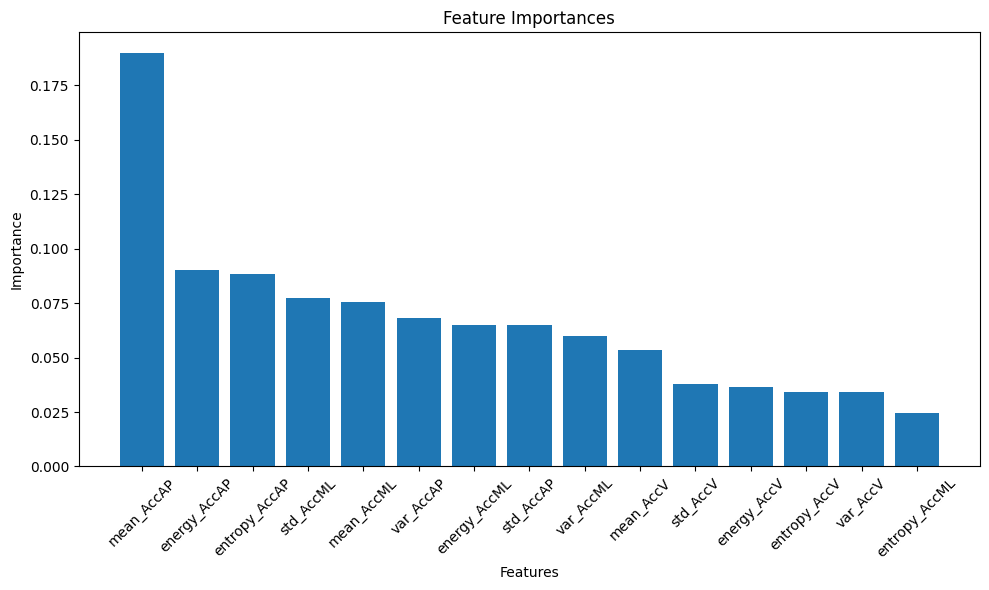

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
param_grid = {
    # 'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(n_jobs=-1)

In [11]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=10, verbose=-1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.7775486827033219
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.09      0.16       128
           1       0.78      0.42      0.55      1111
           2       0.65      0.08      0.15       159

   micro avg       0.78      0.35      0.48      1398
   macro avg       0.81      0.20      0.28      1398
weighted avg       0.79      0.35      0.46      1398
 samples avg       0.11      0.11      0.11      1398



c:\Users\Aleksey Ryabykin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Aleksey Ryabykin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
X = df.drop(['StartHesitation', 'Turn', 'Walking'], axis=1)
y_start_hesitation = df['StartHesitation']
y_turn = df['Turn']
y_walking = df['Walking']

# Split the data into training and testing sets
X_train, X_test, y_train_start_hesitation, y_test_start_hesitation = train_test_split(X, y_start_hesitation, test_size=0.2, random_state=42)
X_train, X_test, y_train_turn, y_test_turn = train_test_split(X, y_turn, test_size=0.2, random_state=42)
X_train, X_test, y_train_walking, y_test_walking = train_test_split(X, y_walking, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier_start_hesitation = RandomForestClassifier(max_depth=10, n_jobs=-1)
rf_classifier_start_hesitation.fit(X_train, y_train_start_hesitation)

rf_classifier_turn = RandomForestClassifier(max_depth=10, n_jobs=-1)
rf_classifier_turn.fit(X_train, y_train_turn)

rf_classifier_walking = RandomForestClassifier(max_depth=10, n_jobs=-1)
rf_classifier_walking.fit(X_train, y_train_walking)

# Make predictions on the test set
y_pred_start_hesitation = rf_classifier_start_hesitation.predict(X_test)
y_pred_turn = rf_classifier_turn.predict(X_test)
y_pred_walking = rf_classifier_walking.predict(X_test)

In [15]:
average_precision_score(y_test_start_hesitation, y_pred_start_hesitation)

0.10565864833906072

In [16]:
average_precision_score(y_test_turn, y_pred_turn)

0.4741563301680437

In [17]:
average_precision_score(y_test_walking, y_pred_walking)

0.08925080409227462